### **Finding the most similar structures to a specific target molecule**

In [1]:
import pandas

mols = pandas.read_table('nci1000.smiles', names=['SMILES', 'NCI_ID'])
mols

,SMILES,NCI_ID
0,CC1=CC(=O)C=CC1=O,1
1,S(SC1=NC2=CC=CC=C2S1)C3=NC4=C(S3)C=CC=C4,2
2,OC1=C(Cl)C=C(C=C1[N+]([O-])=O)[N+]([O-])=O,3
3,[O-][N+](=O)C1=CNC(=N)S1,4
4,NC1=CC2=C(C=C1)C(=O)C3=C(C=CC=C3)C2=O,5
...,...,...
995,OC(=O)CN(CC(O)=O)CC1=CC=CC=C1,1003
996,CC(C)N(CC(O)=O)CC(O)=O,1004
997,C1=CC=C(C=C1)C=NC(N=CC2=CC=CC=C2)C3=CC=CC=C3,1005
998,CC(C)(C)C[C]1(C)NC(=O)NC1=O,1006


In [2]:
from chemaxon import import_mol, ecfp, tanimoto

query = ecfp(import_mol("CC(=O)NC1=CC=C(O)C=C1"), 4, 1024) # ECFP of paracetamol

mols['SIMILARITY'] = mols.apply(lambda row: tanimoto(query, ecfp(import_mol(row['SMILES']), 4, 1024)), axis = 'columns')
mols

,SMILES,NCI_ID,SIMILARITY
0,CC1=CC(=O)C=CC1=O,1,0.117647
1,S(SC1=NC2=CC=CC=C2S1)C3=NC4=C(S3)C=CC=C4,2,0.078947
2,OC1=C(Cl)C=C(C=C1[N+]([O-])=O)[N+]([O-])=O,3,0.121951
3,[O-][N+](=O)C1=CNC(=N)S1,4,0.102564
4,NC1=CC2=C(C=C1)C(=O)C3=C(C=CC=C3)C2=O,5,0.105263
...,...,...,...
995,OC(=O)CN(CC(O)=O)CC1=CC=CC=C1,1003,0.184211
996,CC(C)N(CC(O)=O)CC(O)=O,1004,0.147059
997,C1=CC=C(C=C1)C=NC(N=CC2=CC=CC=C2)C3=CC=CC=C3,1005,0.076923
998,CC(C)(C)C[C]1(C)NC(=O)NC1=O,1006,0.128205


array([[<Axes: title={'center': 'SIMILARITY'}>]], dtype=object)

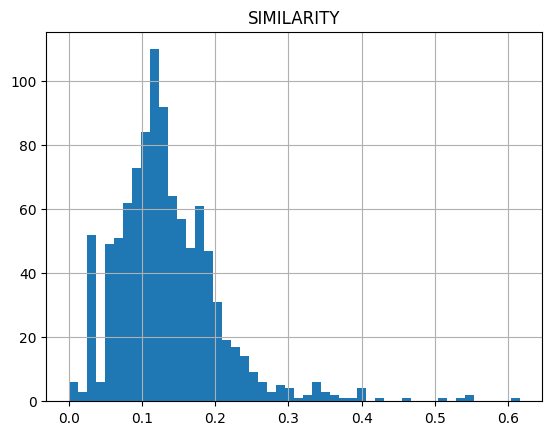

In [3]:
mols.hist('SIMILARITY', bins=50)

In [4]:
most_similars = mols.query('SIMILARITY > 0.5').sort_values(by=['SIMILARITY'], ascending=False)
most_similars

,SMILES,NCI_ID,SIMILARITY
442,CC(=O)NC1=CC=C(Cl)C=C1,444,0.615385
216,CC(=O)NC1=CC=C(C=C1)S(N)(=O)=O,217,0.551724
652,CC(=O)NC1=CC=C(C=C1)C=NO,657,0.548387
634,CC(=O)NC1=CC=C(C=C1)S(=O)(=O)NN,639,0.533333
760,CC(=O)NC1=CC=C(C=C1)C(=O)CCl,768,0.516129


### **The most similar structure to paracetamol from the target molecules**

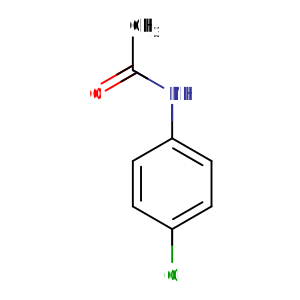

In [5]:
import_mol(most_similars.iloc[0]['SMILES'])

### **The second most similar structure**

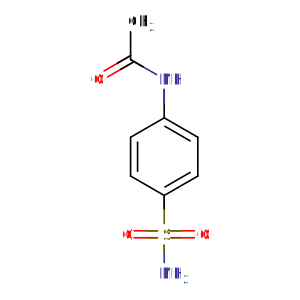

In [6]:
import_mol(most_similars.iloc[1]['SMILES'])